# External Lab 

Here each question is of 1 mark.

# Multiple Linear Regression

## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      I,  the index;
      A1, the petrol tax;
      A2, the per capita income;
      A3, the number of miles of paved highway;
      A4, the proportion of drivers;
      B,  the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [2]:
df=pd.read_csv("C:/Users/Nageswar/AIML/Labs/Residency2/External/petrol.csv")
df.describe()
df

,tax,income,highway,dl,consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

In [3]:
Q3=df.quantile(.75)
Q1=df.quantile(.25)
IQR=Q3-Q1

print("IQR=",IQR)

IQR= tax                1.1250
 income          839.7500
 highway        4045.7500
 dl                0.0655
 consumption     123.2500
dtype: float64


In [4]:
df=df[(~(df< (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]
print(df.shape)

(48, 5)


# Question 3 - Independent variables and collinearity 
Which attributes seems to have stronger association with the dependent variable consumption?

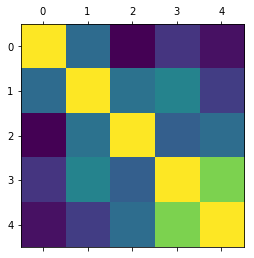

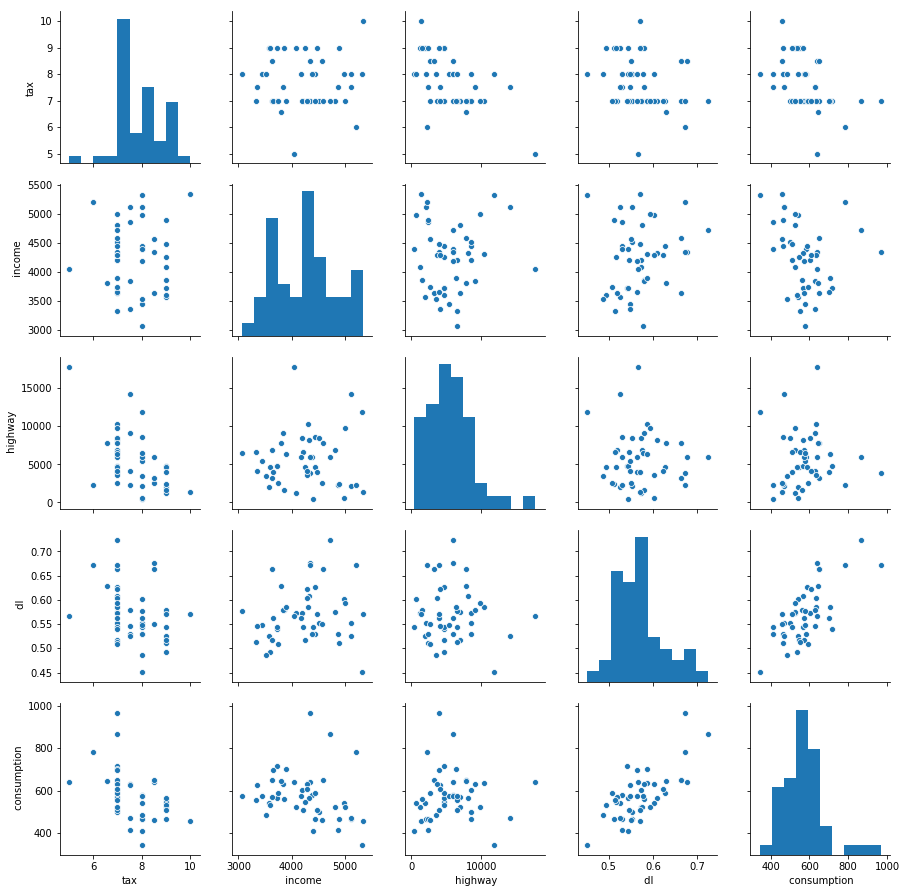

In [5]:
plt.matshow(df.corr())
plt.show()
sns.pairplot(df)


In [6]:
df.corr()
#dl has a strong correlation and tax has negative correlation.

,tax,income,highway,dl,consumption
tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
income,0.012665,1.000000,0.050163,0.157070,-0.244862
highway,-0.522130,0.050163,1.000000,-0.064129,0.019042
dl,-0.288037,0.157070,-0.064129,1.000000,0.698965
consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


### Observing the above correlation values between all the variables, we can see that there is stronger association between the number of drivers and consumption. And comparatively tax has an association in a negative way. 
Insights :
As tax increases the consumption decreases.
As number of drivers is more consumption is more

# Question 4 - Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

In [7]:
X=df.iloc[:,[0,3]]
Y=df.iloc[:,[4]]

In [8]:
print(X,Y)

      tax     dl
0    9.00  0.525
1    9.00  0.572
2    9.00  0.580
3    7.50  0.529
4    8.00  0.544
5   10.00  0.571
6    8.00  0.451
7    8.00  0.553
8    8.00  0.529
9    7.00  0.552
10   8.00  0.530
11   7.50  0.525
12   7.00  0.574
13   7.00  0.545
14   7.00  0.608
15   7.00  0.586
16   7.00  0.572
17   7.00  0.540
18   7.00  0.724
19   8.50  0.677
20   7.00  0.663
21   8.00  0.602
22   9.00  0.511
23   9.00  0.517
24   8.50  0.551
25   9.00  0.544
26   8.00  0.548
27   7.50  0.579
28   8.00  0.563
29   9.00  0.493
30   7.00  0.518
31   7.00  0.513
32   8.00  0.578
33   7.50  0.547
34   8.00  0.487
35   6.58  0.629
36   5.00  0.566
37   7.00  0.586
38   8.50  0.663
39   7.00  0.672
40   7.00  0.626
41   7.00  0.563
42   7.00  0.603
43   7.00  0.508
44   6.00  0.672
45   9.00  0.571
46   7.00  0.623
47   7.00  0.593      consumption
0            541
1            524
2            561
3            414
4            410
5            457
6            344
7            467
8            4

# Question 5 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

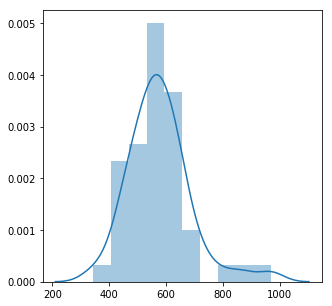

In [10]:
plt.figure(figsize=(5,5))
plt.tight_layout()
sns.distplot(Y)

In [11]:
print("shape of x train :",X_train.shape)
print("shape of x test :",X_test.shape)
print("shape of y train :",y_train.shape)
print("shape of y test :",y_test.shape)

shape of x train : (38, 2)
shape of x test : (10, 2)
shape of y train : (38, 1)
shape of y test : (10, 1)


# Question 6 - Build Model 
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [12]:
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [13]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
eff_df = pd.DataFrame(regressor.coef_,columns=X.columns.array)
eff_df

,tax,dl
0,-32.543827,1365.524968


# R-Square 

# Question 7 - Evaluate the model 
Calculate the accuracy score for the above model.

In [15]:
y_pred = regressor.predict(pd.DataFrame(X_test))

from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
rmse

75.02401878179988

# Question 8: Repeat the same Multi linear regression modelling by adding both Income and Highway features
Find R2 


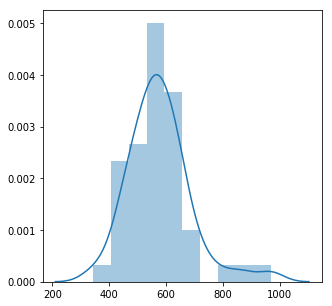

In [16]:
X=df.iloc[:,[0,1,2,3]]
Y=df.iloc[:,[4]]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
plt.figure(figsize=(5,5))
plt.tight_layout()
sns.distplot(Y)

In [17]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
eff_df = pd.DataFrame(regressor.coef_,columns=X.columns.array)
eff_df

,tax,income,highway,dl
0,-40.01666,-0.065413,-0.004741,1341.862121


In [19]:
y_pred = regressor.predict(pd.DataFrame(X_test))

from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
rmse

68.31064915215165

# Question 9: Print the coefficients of the multilinear regression model

In [20]:
regressor.coef_

array([[-4.00166602e+01, -6.54126674e-02, -4.74073380e-03,
         1.34186212e+03]])

In [21]:
regressor.intercept_

array([425.5993322])

# Question 10 
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer

### *R squared value increase if we increase the number of independent variables to our analysis

#### R Square value has decreased when we add independent variables. 
#### This indicates, the independent variables have a negative impact on the outcome of the model.  
